# Desafio Cientista de Dados - Lighthouse (Indicium)

## Objetivo do desafio
Desenvolver um modelo de previsão de preços a partir do dataset teste_indicium_precificacao.csv e avaliar esse modelo com o uso das métricas de avaliação que mais fazem sentido para o problema.

In [1]:
#importação das bibiotecas usadas
import pandas as pd #biblioteca para o carregamento de datasets a partir de arquivos CSV, Excel e outros formatos
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para simplificar o código de geração de gráficos
from sklearn.model_selection import train_test_split, RandomizedSearchCV #necessário para o split entre treinamento e teste e para a otimização de hiperparâmetros
from sklearn.svm import SVR #necessário para treinar um modelo de regressão
from sklearn.preprocessing import OrdinalEncoder #necessário para converter colunas do tipo texto para numéricas
from sklearn.metrics import * #importação de todas as funções métricas da biblioteca scikit-learn
from sklearn.pipeline import Pipeline #necessário para criar pipelines
from sklearn import set_config #utilizado para visualização dos passos do pipeline
set_config(display="diagram") #forçando para que os passos do pipeline sejam mostrados visualmente

In [2]:
#carregamento da base de dados CSV
#considerando o valor 0 como um valor faltante/vazio
df = pd.read_csv('teste_indicium_precificacao.csv', na_values = 0)

In [3]:
#visualização das 5 primeiras instâncias/linhas
df.head(5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45.0,2019-05-21,0.38,2,355.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,NaN,NaN,NaN,1,365.0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270.0,2019-07-05,4.64,1,194.0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9.0,2018-11-19,0.10,1,NaN
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74.0,2019-06-22,0.59,1,129.0


In [4]:
#tipos de cada variável
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                            float64
minimo_noites                      int64
numero_de_reviews                float64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365              float64
dtype: object

In [5]:
# quantidade de instâncias/linhas
df.shape[0]

48894

In [6]:
#quantidade de variáveis/colunas
df.shape[1]

16

In [7]:
# informações estatísticas para cada coluna (contagem, média, desvio padrão, mínimo, máximo e os percentis 25%, 50% e 75%)
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48883.000000,48894.000000,38842.000000,38842.000000,48894.000000,31361.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.755130,7.030085,29.298079,1.373251,7.144005,175.825962
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.172716,20.510741,48.186884,1.680453,32.952855,126.185126
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,3.000000,0.190000,1.000000,55.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,9.000000,0.720000,1.000000,168.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,33.000000,2.020000,2.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#formatação em 3 casas decimais para melhor interpretação das informações estatísticas de cada coluna
pd.set_option('display.float_format', '{:.3f}'.format)

In [9]:
#informações estatísticas de cada coluna formatado em 3 casa decimais
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000,48894.000,48894.000,48894.000,48883.000,48894.000,38842.000,38842.000,48894.000,31361.000
mean,19017532.131,67621393.582,40.729,-73.952,152.755,7.030,29.298,1.373,7.144,175.826
std,10982884.049,78611176.150,0.055,0.046,240.173,20.511,48.187,1.680,32.953,126.185
min,2595.000,2438.000,40.500,-74.244,10.000,1.000,1.000,0.010,1.000,1.000
25%,9472370.750,7822736.750,40.690,-73.983,69.000,1.000,3.000,0.190,1.000,55.000
50%,19677431.500,30795529.000,40.723,-73.956,106.000,3.000,9.000,0.720,1.000,168.000
75%,29152249.250,107434423.000,40.763,-73.936,175.000,5.000,33.000,2.020,2.000,305.000
max,36487245.000,274321313.000,40.913,-73.713,10000.000,1250.000,629.000,58.500,327.000,365.000


In [10]:
#forma de descobrir se há ou não valores nulos (ou 0) no dataset
df.isna().values.any()

True

In [11]:
#para saber quantos valores nulos (ou 0) há em cada variável
df.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                               11
minimo_noites                        0
numero_de_reviews                10052
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365              17533
dtype: int64

In [12]:
#substituição dos dados NaN (Not a Number) ou com 0 de "reviews_por_mes", "numero_de_reviews", "disponibilidade_365" e "price" 
#com base na média
#lembrando que não faz sentido ter 11 preços com valor zero (quem aluga por US$ 00,00?)
df = df.fillna(df.mean())
df.head(5)

C:\Users\lucca\AppData\Local\Temp\ipykernel_20816\2967491563.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225.000,1,45.000,2019-05-21,0.380,2,355.000
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150.000,3,29.298,NaN,1.373,1,365.000
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89.000,1,270.000,2019-07-05,4.640,1,194.000
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80.000,10,9.000,2018-11-19,0.100,1,175.826
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.748,-73.975,Entire home/apt,200.000,3,74.000,2019-06-22,0.590,1,129.000


In [13]:
#nova verificação de quantos valores nulos ou com 0 há em cada coluna
df.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [14]:
#excluindo as colunas "host_name" e "ultima_review"
df = df.drop(["host_name", "ultima_review"], axis=1)

In [15]:
#utilizando o método ffill que substitui valores faltantes pelo último valor válido que o antecede
df = df.fillna(method="ffill")

In [16]:
#verificando se após as mudanças acima ainda há valores faltantes ou zerados
df.isna().sum()

id                               0
nome                             0
host_id                          0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

<AxesSubplot:>

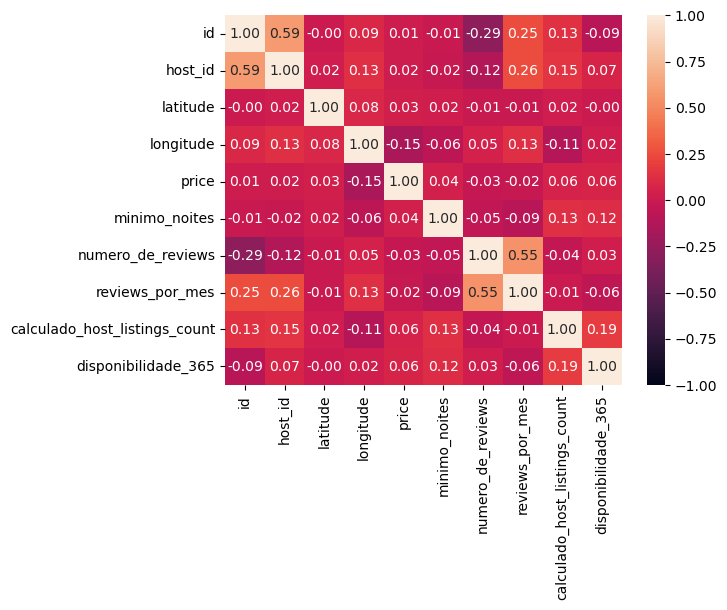

In [17]:
#usando um mapa de calor com dados numéricos formatos em 2 casas decimais para verificar a correlação das variáveis
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")

### Descobrindo qual lugar é mais indicado para uma pessoa investir na compra de um apartamento para alugar

Um apartamento que daria bom lucro para seu proprietário seria aquele que apresenta pouca disponibilidade durante o ano, pois significaria que ele possui muitas reservas e consequentemente é bem procurado. Além disso, um apartamento bastante procurado ou badalado seria aquele que apresenta um número alto de reviews/comentários/avaliações. Sendo assim, o ideal é procurar o apartamento onde há menor disponibilidade e maior número de reviews.
Para isso, separei 2 datasets: df_disponibilidade que começa com os apartamentos com menor disponibilidade e df_n_reviews que começa com os apartamentos com maior número de reviews.
Depois, para cada dataset eu peguei a coluna bairro e transformei em lista, obtendo: lista_bairro_disponibilidade e lista_bairro_n_reviews. Coloquei elas em um loop para que quando no mesmo contador fosse encontrado o mesmo bairro nas duas listas ele pegasse o contador atual e reservasse na variável indice_encontrado.
Depois, ele mostra a instância de um dos datasets ordenados com base no valor de indice_encontrado. Desse modo, ele mostra o apartamento e o bairro do apartamento com menor disponibilidade e maior número de reviews ao mesmo tempo.

In [18]:
df_disponibilidade = df.sort_values(by='disponibilidade_365', ascending=True) #do menor para o maior
lista_bairro_disponibilidade = df_disponibilidade['bairro'].tolist() #lista de bairros a partir da coluna 'bairro'

df_n_reviews = df.sort_values(by='numero_de_reviews', ascending=False) #do maior para o menor
lista_bairro_n_reviews = df_n_reviews['bairro'].tolist() #lista de bairros a partir da coluna 'bairro'

i = 0 #contador
indice_encontrado = 0 #variável fora do escopo do while
while True: #enquanto for verdade
  if lista_bairro_disponibilidade[i] == lista_bairro_n_reviews[i]: #condição que se quer encontrar
      indice_encontrado = i #variável fora do while recebe um valor
      break #loop é quebrado/interrompido
  i += 1 #necessário para que o while percorra outros índices
        
df_disponibilidade.iloc[indice_encontrado] #em df_disponibilidade, mostrar a instância no índice encontrado no loop

id                                                                  21766776
nome                             Spacious Renovated Duplex in Central Harlem
host_id                                                              4379024
bairro_group                                                       Manhattan
bairro                                                                Harlem
latitude                                                              40.805
longitude                                                            -73.949
room_type                                                    Entire home/apt
price                                                                225.000
minimo_noites                                                              3
numero_de_reviews                                                      2.000
reviews_por_mes                                                        0.130
calculado_host_listings_count                                              1

O apartamento mais indicado é o Spacious Renovated Duplex in Central Harlem, situado no Harlem que fica em Manhattan.

### Histograma para analisar grupo de bairros

<AxesSubplot:xlabel='bairro_group', ylabel='Count'>

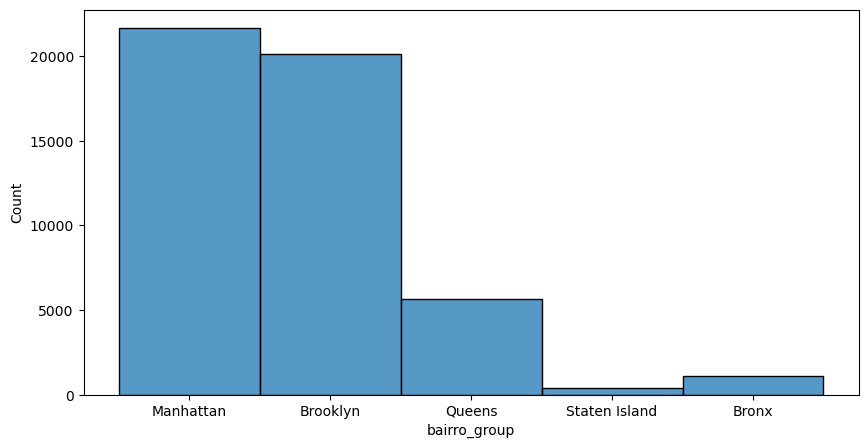

In [19]:
#histograma dos grupos de bairros presentes no dataset
plt.figure(figsize=(10,5))
sns.histplot(df["bairro_group"], kde=False)

Manhattan tem mais apartamentos disponíveis e logo em seguida Brooklyn. Queens tem bem menos apartamentos, enquanto Bronx e Staten Island tem quantidades muito menores ainda.

### Boxplot de preço

(-10.0, 400.0)

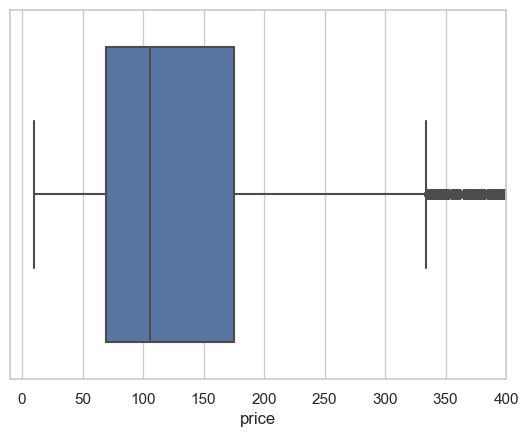

In [20]:
#boxplot da variável price que apresenta muitos outliers para cima
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["price"])
plt.xlim(-10, 400)

Visualmente vemos que há outliers para cima, com muitos apartamentos destoando da maioria. Todavia, os valores mais proeminentes estão na faixa de 50 a 200 aproximadamente.

### Histograma sobre os tipos de quartos para alugar

<AxesSubplot:xlabel='room_type', ylabel='Count'>

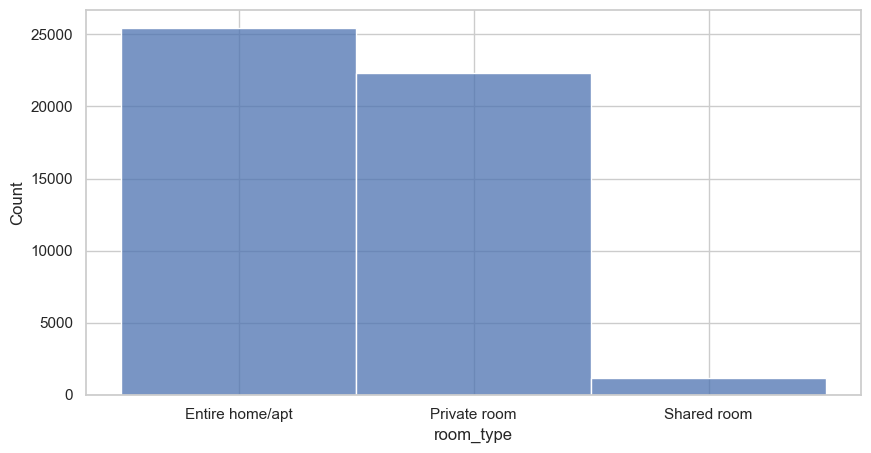

In [21]:
#histograma dos tipos de quartos para alugar
plt.figure(figsize=(10,5))
sns.histplot(df["room_type"], kde=False)

A grande maioria é do tipo Entire home/apt e logo em seguida vem o Private room. Apartamentos do tipo Shared room são bem poucos.

### Boxplot sobre o mínimo de noites que se pode alugar

(-10.0, 15.0)

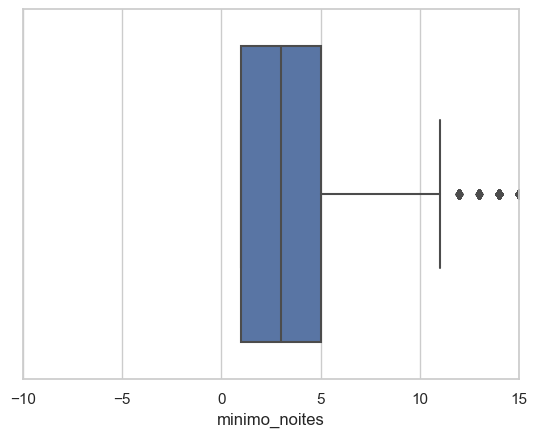

In [22]:
#boxplot do mínimo de noites que se pode alugar
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["minimo_noites"])
plt.xlim(-10, 15)

A maioria dos apartamentos tem como noites mínimas para se alugar uma quantidade que não chega à uma semana. Ainda sim há alguns que extrapolam, chegando a mais de duas semanas mínimas (outliers).

### Histograma para analisar o número de reviews

(-5.0, 130.0)

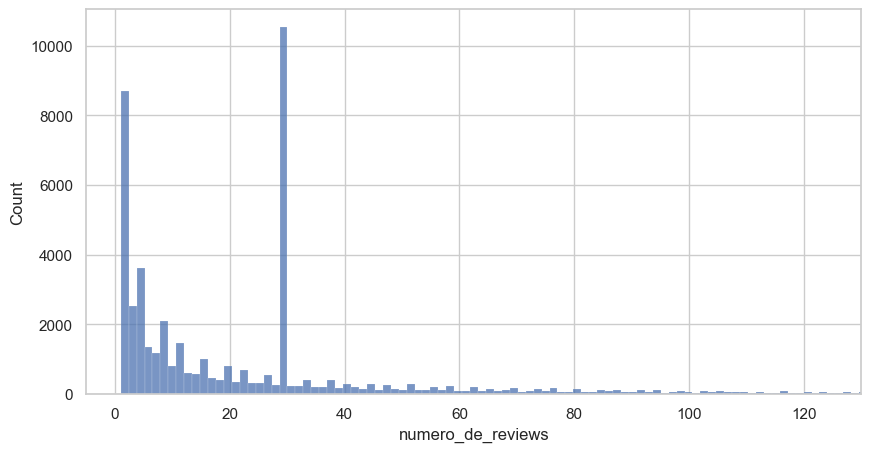

In [23]:
#histograma do número de reviews
plt.figure(figsize=(10,5))
sns.histplot(df["numero_de_reviews"], kde=False)
plt.xlim(-5, 130)

Percebe-se que a tendência é que poucos apartamentos possuam números altos de reviews, enquanto muitos apresentam números mais baixos (abaixo de 20, por exemplo). Todavia, há muitos apartamentos com números de reviews parecidos próximo de 30 (o pico entre 20 e 40).

### Boxplot sobre a disponibilidade de dias ao ano para reserva

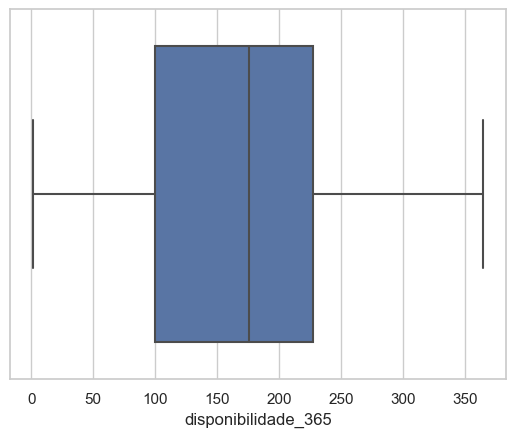

In [24]:
#boxplot da disponibilidade de dias ao ano dos quartos para alugar
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["disponibilidade_365"])

A distribuição está bem centralizada, mas ainda sim há mais quartos com pouca disponibilidade do que com muita disponibilidade, o que mostra o por quê do boxplot estar mais puxado para a esquerda.

### Análise multivariada da relação entre preço, grupo de bairro e tipo de quarto

(-10.0, 500.0)

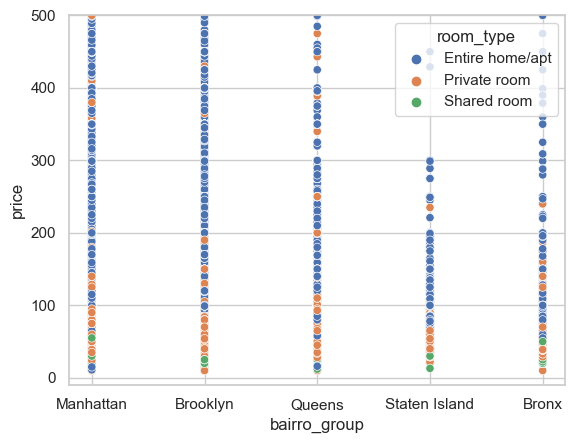

In [25]:
#análise multivariada da relação entre preço, grupo de bairro e tipo de quarto
sns.scatterplot(data=df, x="bairro_group", y="price", hue="room_type")
plt.ylim(-10, 500)

O que se pode ver é que há uma maior concentração de quartos privados na faixa de 0 à 100 dólares. Casa inteira ou apartamento lidera mais as faixas acima de 100 dólares. Os quartos compartilhados são mais baratos, ficando sempre abaixo de 100 dólares.

### A disponibilidade ao longo do ano interfere no preço?

<AxesSubplot:xlabel='price', ylabel='disponibilidade_365'>

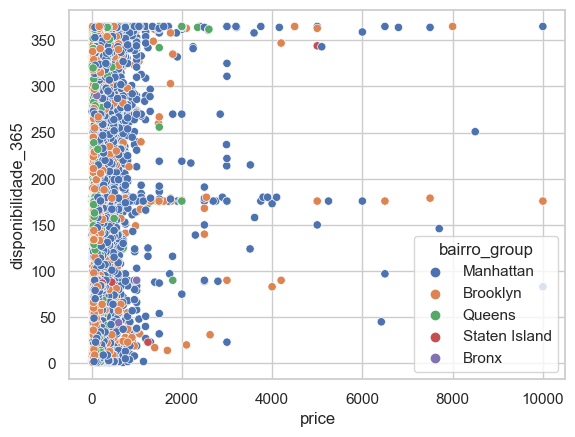

In [26]:
sns.scatterplot(data=df, x="price", y="disponibilidade_365", hue="bairro_group")

Visualmente não vemos uma correlação significativa que evidencie que a disponibilidade ao longo do ano afete o preço, pois vemos uma maior concentração de apartamentos na faixa de preço abaixo de 2000 tanto com baixa ou muita disponibilidade. A correlação da disponibilidade com o preço, pelo mapa de calor, era de 0,06 o que seria o mesmo que 6%, algo bem irrisório para dizer que seja considerável. 

### O número mínimo de noites interfere  no preço?

<AxesSubplot:xlabel='price', ylabel='minimo_noites'>

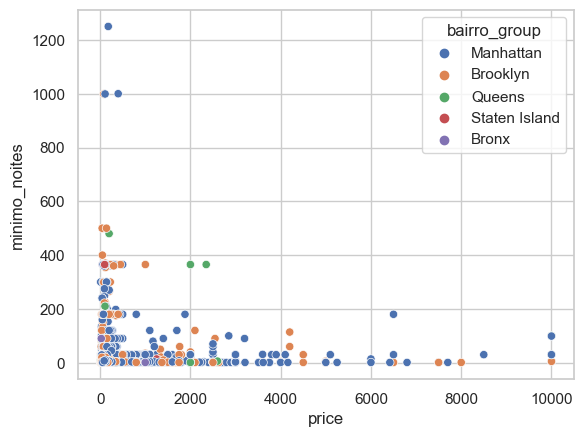

In [27]:
sns.scatterplot(data=df, x="price", y="minimo_noites", hue="bairro_group")

Pelo mapa de calor vemos que a correlação entre a quantidade mínima de noites para reservar e o preço é de 0,04 ou 4%, o que é muito pequeno (até menor que o anterior) para ser considerado. Visualmente vemos casos de apartamentos com a mesma quantia de noites mínimas com preços bem variados ou com a mesma faixa de preço e quantidade de noites mínimas variadas.

### Qual tipo de quarto para reservar é geralmente mais caro?

<AxesSubplot:xlabel='price', ylabel='room_type'>

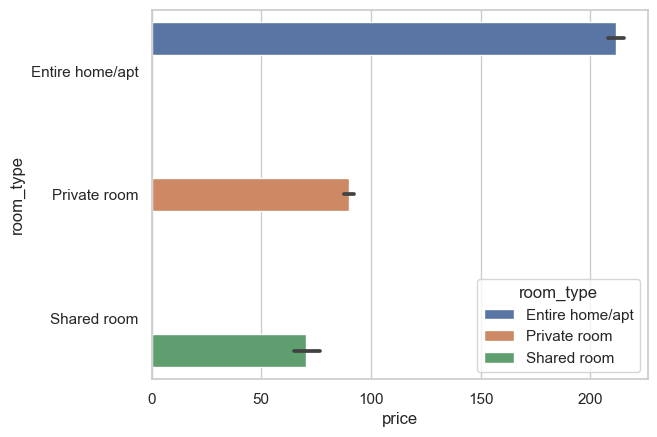

In [28]:
sns.barplot(data=df, x="price", y="room_type", hue="room_type")

Os quartos do tipo casa inteira/apartamento são bem mais custosos em detrimento dos demais, passando da média dos 200 dólares. Tanto o quarto privado quanto o compartilhado não passam dos 100 dólares.

### Verificação se há ou não padrão nos nomes dos apartamentos de mais alto padrão (mais custosos)

In [29]:
# ordenação do dataset pelo preço do mais alto para o mais baixo
df_ordenado = df.sort_values(by='price', ascending=False)
df_ordenado.head(30) #mostrando os 30 primeiros (os 30 mais caros)

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
29237,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.772,-73.987,Entire home/apt,10000.000,30,29.298,1.373,1,83.000
9150,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.768,-73.917,Private room,10000.000,100,2.000,0.040,1,175.826
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.733,-73.957,Entire home/apt,10000.000,5,5.000,0.160,1,175.826
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.714,-73.985,Private room,9999.000,99,6.000,0.140,1,83.000
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,40.720,-73.986,Entire home/apt,9999.000,30,29.298,1.373,1,365.000
6529,4737930,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.793,-73.939,Entire home/apt,9999.000,5,1.000,0.020,1,175.826
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Manhattan,Tribeca,40.722,-74.006,Entire home/apt,8500.000,30,2.000,0.180,1,251.000
4376,2953058,Film Location,1177497,Brooklyn,Clinton Hill,40.691,-73.967,Entire home/apt,8000.000,1,1.000,0.030,11,365.000
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Manhattan,Upper East Side,40.768,-73.960,Entire home/apt,7703.000,1,29.298,1.373,12,146.000
45665,34895693,Gem of east Flatbush,262534951,Brooklyn,East Flatbush,40.657,-73.924,Private room,7500.000,1,8.000,6.150,2,179.000


Pode-se verificar que há nomes que usam palavras como "luxury" e "mansion" que por si só já indicam alto padrão. Além disso, percebe-se que há alguns que evidenciam locais geográficos privilegiados de New York que com certeza deve fornecer uma vista muito bela, o fato de ser perto de muitos locais úteis, etc. Alguns outros usam com certa frequência a palavra "SuperBowl".

In [30]:
df_ordenado.tail(30) #mostrando os 30 últimos (os 30 mais baratos)

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
22312,18007671,Cute 1 bedroom basement apartment,73228035,Brooklyn,East Flatbush,40.662,-73.938,Private room,15.000,1,2.000,0.070,2,175.826
33447,26443106,"trip NYC - your Couch - clean, cheap, close to...",182488531,Queens,Elmhurst,40.738,-73.871,Shared room,15.000,1,19.000,1.710,2,271.000
45177,34577268,The duplex of city center,257474717,Queens,Flushing,40.755,-73.834,Entire home/apt,15.000,2,29.298,1.373,1,361.000
47978,36022650,Charming entire apartment in Hell's Kitchen,2967377,Manhattan,Hell's Kitchen,40.763,-73.995,Entire home/apt,15.000,2,29.298,1.373,1,139.000
36996,29414633,private room,221574115,Brooklyn,Bensonhurst,40.612,-74.002,Shared room,15.000,10,29.298,1.373,2,175.826
45645,34870577,Happy Home 3,158178970,Staten Island,Randall Manor,40.631,-74.126,Shared room,13.000,1,9.000,5.510,3,8.000
28018,21893604,Private Bedroom in West Village/Chelsea,1144452,Manhattan,Chelsea,40.740,-74.000,Private room,12.000,3,8.000,0.590,1,37.000
21280,16927533,Studio with amazing view,3737986,Manhattan,Financial District,40.706,-74.016,Entire home/apt,12.000,300,29.298,1.373,1,175.826
28241,21981703,Beautiful and Charming 2 Bedroom in Brooklyn!,2066240,Brooklyn,Crown Heights,40.674,-73.944,Entire home/apt,12.000,3,29.298,1.373,1,175.826
47159,35612982,Luggage drop off ONLY! Close to LGA & JFK,108512889,Queens,Sunnyside,40.740,-73.921,Shared room,12.000,1,29.298,1.373,1,359.000


Os mais baratos não usam palavras como "luxury", "mansion" ou "(...) location" indicando algum local de fotografia ou de filmes ou peças da Broadway. Mesmo assim, alguns indicam bela paisagem, espaço grande e muitos evidenciam aconchego.

### Tratando os outliers de preço

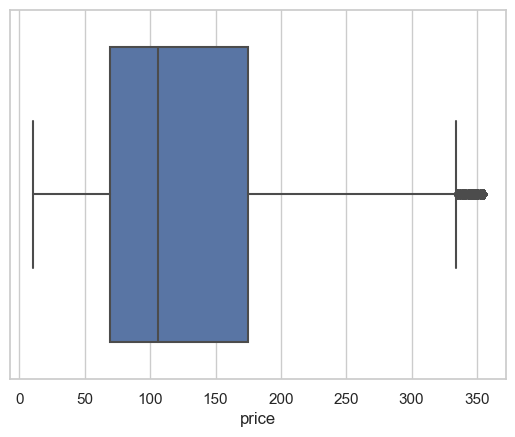

In [31]:
#looping para substituir os outliers superiores de preço para o valor limite que equivale aos 95% do intervalo do box-plot 
for valor in df["price"]: #loop para percorrer toda a coluna de "price"
    limite_superior = df["price"].quantile(0.95) #definindo o limite superior
    df["price"] = df["price"].mask(df["price"] > limite_superior, limite_superior) #substituir os valores altos pelo limt sup
    
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["price"])

### Início dos algoritmos de machine learning

Inicialmente, necessário se faz a divisão do dataset em base de treino e de teste. A base de treino vai servir para "aprender", enquanto que a base de teste vai servir para avaliar se o modelo de fato aprendeu bem.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, #aqui informa-se os atributos
                                                    df["price"], #aqui informa-se a label
                                                    test_size=0.25, #aqui informa-se a porcentagem de divisão da base de teste
                                                    random_state=0) #aqui informa-se um "seed", que é um valor aleatório e usado para que alguns algoritmos iniciem de forma aleatória a sua divisão

display("Base de treinamento:")
display(X_train)
display(y_train)

display("Base de teste:")
display(X_test)
display(y_test)

'Base de treinamento:'

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
22402,18092438,LOCATION! Coffee and Central Park!,17428203,Manhattan,Upper East Side,40.772,-73.948,Entire home/apt,124.000,31,29.298,1.373,2,175.826
41283,32137567,Artsy Cozy Little Italy Apt! PRIME LOCATION!,11263163,Manhattan,Little Italy,40.719,-73.997,Entire home/apt,150.000,1,18.000,3.830,1,175.826
20114,16110204,"Cozy, convenient Park Slope 2br",394223,Brooklyn,South Slope,40.665,-73.990,Entire home/apt,130.000,4,1.000,0.030,1,175.826
13790,10390252,NEW listing! Large Prospect Park 1 Bed,2581816,Brooklyn,Flatbush,40.650,-73.960,Entire home/apt,80.000,7,29.298,1.373,1,175.826
12043,9368365,Perfect 1 BR in UWS,22157668,Manhattan,Upper West Side,40.781,-73.984,Entire home/apt,250.000,5,29.298,1.373,1,175.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,16874685,MASSIVE ROOM IN HEART OF NYC!!! (CHELSEA/FLATI...,13492085,Manhattan,Chelsea,40.745,-73.992,Private room,200.000,1,8.000,0.280,2,175.826
45891,34997929,Amazing 3bd/2ba Town-Home In Prime Williamsburg,16625273,Brooklyn,Williamsburg,40.715,-73.946,Entire home/apt,295.000,2,2.000,2.000,3,298.000
42613,33075770,Private room in Lower East Side,4221836,Manhattan,Lower East Side,40.719,-73.993,Private room,95.000,5,7.000,2.280,1,118.000
43567,33719823,"Large, Bright, Luxury Chelsea Studio/ Best Are...",254189342,Manhattan,Chelsea,40.751,-73.995,Entire home/apt,200.000,4,1.000,1.000,1,228.000


22402   124.000
41283   150.000
20114   130.000
13790    80.000
12043   250.000
          ...  
21243   200.000
45891   295.000
42613    95.000
43567   200.000
2732    102.000
Name: price, Length: 36670, dtype: float64

'Base de teste:'

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
43812,33893655,Studio in doorman building in Tribeca,138798990,Manhattan,Tribeca,40.724,-74.011,Entire home/apt,225.000,3,29.298,1.373,1,42.000
32733,25798461,Large 2 bedroom downtown Loft Apartment,195803,Manhattan,NoHo,40.726,-73.993,Entire home/apt,355.000,1,5.000,0.400,1,75.000
25275,20213045,Spacious and Modern 2 Bed/2.5 Bath Dream Townh...,2678122,Brooklyn,Williamsburg,40.717,-73.950,Entire home/apt,300.000,5,5.000,0.350,3,31.000
34849,27628754,NYC entire 2 bd apartment 15 min to Manhattan,68907781,Queens,Astoria,40.769,-73.929,Entire home/apt,120.000,1,5.000,0.520,3,175.826
17736,13920801,Beautiful 2 bedroom private suite,10312167,Manhattan,Harlem,40.803,-73.951,Entire home/apt,99.000,28,76.000,2.160,2,296.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12146,9426406,Stunning 2 bd home in historic limestone,12241602,Brooklyn,Bedford-Stuyvesant,40.692,-73.943,Entire home/apt,125.000,7,29.298,1.373,1,175.826
20846,16511493,You Deserve The Royal Treatment.,108433379,Bronx,Norwood,40.877,-73.874,Entire home/apt,130.000,5,29.298,1.373,1,89.000
30559,23649906,2 Bedroom Brooklyn Apt Minutes from NYC Landma...,177036542,Brooklyn,Bedford-Stuyvesant,40.684,-73.958,Entire home/apt,175.000,2,44.000,2.720,1,285.000
17794,13956326,2 Bedroom Duplex with large backyard,18113574,Brooklyn,Williamsburg,40.712,-73.937,Entire home/apt,200.000,4,1.000,0.030,1,175.826


43812   225.000
32733   355.000
25275   300.000
34849   120.000
17736    99.000
          ...  
12146   125.000
20846   130.000
30559   175.000
17794   200.000
25916   300.000
Name: price, Length: 12224, dtype: float64

### Pipeline para treinar e testar o modelo

O problema em si é de regressão, pois queremos prever um valor numérico (no caso, o preço dos aluguéis). Para isso, foi escolhido o método SVR (Support Vector Regression) que visa prever valores contínuos tanto seprados linearmente quanto não separados linearmente.

In [33]:
pipe = Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)), # passo 1: enconder
                 ('modelo', SVR())]).fit(X_train, y_train) # passo 2: modelo

y_pred = pipe.predict(X_test)
display(f'Resultados de y_pred: {y_pred}')

display(f'Passos do pipeline (para fins ilustrativos):')
pipe

'Resultados de y_pred: [159.14357408 147.93160335 123.1493632  ... 124.54530327 116.94460544\n 151.8251699 ]'

'Passos do pipeline (para fins ilustrativos):'

Pipeline(steps=[('encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('modelo', SVR())])

### Métricas de regressão
Foi escolhido o MSE, MSLE e o MAE como formas de verificar se o modelo aprendeu bem, ou seja, se os valores do teste foram parecidos com o previsto. O MSE penaliza muito os valores discrepantes, pois usa elevação ao quadrado, o que pode causar uma distorção nos resultados, sendo mais indicado o uso do RMSE. O MSLE usa logaritmos e pesa mais os erros que são para baixo do que os para cima (se ele preve um valor de 95 dólares e o valor do teste é de 100 dólares, ele apresentará um MSLE maior do que se tivesse previsto 105 dólares). O MAE é a média de todos os erros desconsiderando seu sinal. Ele não penaliza os erros dos outliers e é de maior interpretabilidade, pois o erro de 64,079 significa que ele está errando 64,079 dólares tanto para mais quanto para menos nas suas previsões.

In [34]:
display(f"MSE para todas as instâncias: {mean_squared_error(y_test, y_pred)}")
display(f"MSLE para todas as instâncias: {mean_squared_log_error(y_test, y_pred)}")
display(f"MAE para todas as instâncias: {mean_absolute_error(y_test, y_pred)}")

'MSE para todas as instâncias: 6937.4055117705775'

'MSLE para todas as instâncias: 0.38138865560843405'

'MAE para todas as instâncias: 64.07954429311583'

### Otimizando os hiperparâmetros para tentar suavizar os erros

In [35]:
# rodando o encoder antes de otimizar os hiperparâmetros
# se tentássemos otimizar *dentro* do pipeline teríamos um erro
X_train_encoded = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit_transform(X_train)

In [36]:
# esses são os parâmetros do SVR com valores aleatórios para serem combinados no randomized search
parametros = {
    'C': [1.0, 1.3, 1.6],
    'shrinking': [True, False],
    'epsilon': [0.1, 0.2, 0.3]
}

In [37]:
clf_random = RandomizedSearchCV(SVR(), parametros, verbose=3)
clf_random.fit(X_train_encoded, y_train)

# mostrando o melhor modelo segundo o Random Search
best_random_search = clf_random.best_estimator_
display('Melhor classificador segundo o Random Search: ')
display(best_random_search)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1.3, epsilon=0.3, shrinking=False;, score=0.122 total time=  58.2s
[CV 2/5] END C=1.3, epsilon=0.3, shrinking=False;, score=0.114 total time=  38.0s
[CV 3/5] END C=1.3, epsilon=0.3, shrinking=False;, score=0.126 total time= 1.2min
[CV 4/5] END C=1.3, epsilon=0.3, shrinking=False;, score=0.122 total time=  45.2s
[CV 5/5] END C=1.3, epsilon=0.3, shrinking=False;, score=0.130 total time=  59.4s
[CV 1/5] END C=1.3, epsilon=0.1, shrinking=False;, score=0.122 total time= 1.1min
[CV 2/5] END C=1.3, epsilon=0.1, shrinking=False;, score=0.114 total time=  37.0s
[CV 3/5] END C=1.3, epsilon=0.1, shrinking=False;, score=0.126 total time=  47.8s
[CV 4/5] END C=1.3, epsilon=0.1, shrinking=False;, score=0.122 total time= 1.3min
[CV 5/5] END C=1.3, epsilon=0.1, shrinking=False;, score=0.130 total time= 1.3min
[CV 1/5] END C=1.0, epsilon=0.3, shrinking=False;, score=0.113 total time= 1.2min
[CV 2/5] END C=1.0, epsilon=0.3, shri

'Melhor classificador segundo o Random Search: '

SVR(C=1.6, epsilon=0.3, shrinking=False)

### Novo modelo com o uso dos melhores valores nos hiperparâmetros do SVR

In [38]:
pipe_otimizado_randomsearch = Pipeline([('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                                        ('modelo', best_random_search)]).fit(X_train, y_train)

y_pred_otimizado_randomsearch = pipe_otimizado_randomsearch.predict(X_test)
display(f'Resultados de y_pred: {y_pred_otimizado_randomsearch}')

display(f'Passos do pipeline (para fins ilustrativos):')
pipe_otimizado_randomsearch

'Resultados de y_pred: [163.66363913 151.14688604 123.77054659 ... 124.69282415 116.66288906\n 155.23249437]'

'Passos do pipeline (para fins ilustrativos):'

Pipeline(steps=[('encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('modelo', SVR(C=1.6, epsilon=0.3, shrinking=False))])

In [39]:
display(f"MSE para todas as instâncias: {mean_squared_error(y_test, y_pred_otimizado_randomsearch)}")
display(f"MSLE para todas as instâncias: {mean_squared_log_error(y_test, y_pred_otimizado_randomsearch)}")
display(f"MAE para todas as instâncias: {mean_absolute_error(y_test, y_pred_otimizado_randomsearch)}")

'MSE para todas as instâncias: 6888.333526742067'

'MSLE para todas as instâncias: 0.3805043773374308'

'MAE para todas as instâncias: 63.936105685979946'

Os erros de modo geral abaixaram um pouco, o que evidencia que o randomized search de fato contribuiu, pelo menos um pouco, para melhorar a performance do modelo. Evidentemente que o uma métrica como o grid search seria mais  indicado, pois ele efetua uma busca exaustiva, testando todas as combinações possíveis, para encontrar os melhores valores. Porém, essa métrica demoraria muito tempo, o que não seria interessante tendo em vista que o randomized search (que seleciona combinações aleatórias) já consumiu boa parte do tempo como pode-se ver mais acima. Além disso, na definição dos parâmetros, posso ter feito uma escolha menos efetiva, além dos valores que forneci.